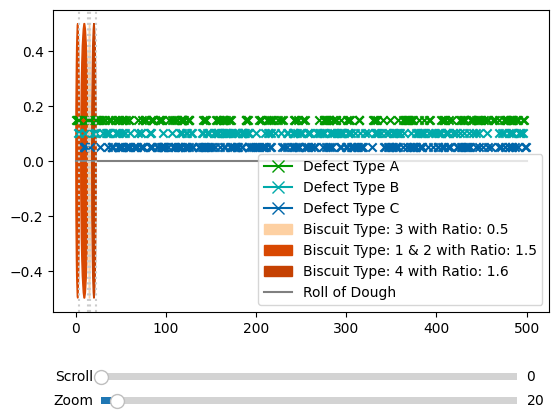

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.patches as patches
import pandas as pd

class Biscuit():
    def __init__(self, length, value, position):
        self.length = length
        self.value = value
        self.position = position

def plot_defects_on_1d_space(length=500, initial_view=20, defects_file='defects.csv', biscuits=None):
    def update(val):
        ax.set_xlim(slider.val, slider.val + length_slider.val)

    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.25)

    x = np.linspace(0, length, length)
    y = np.zeros_like(x)
    ax.plot(x, y, color='gray', label='Roll of Dough')

    unique_ratios = set()  # Collect unique biscuit ratios

    if biscuits is not None:
        for biscuit in biscuits:
            x_position = biscuit.position
            biscuit_width = biscuit.length
            biscuit_ratio = (biscuit.value / biscuit.length) / 2
            unique_ratios.add(biscuit_ratio)  # Collect unique biscuit ratios
            biscuit_color = plt.cm.Oranges(biscuit_ratio)  # Use Oranges colormap for shades of orange
            biscuit_ellipse = patches.Ellipse((x_position + biscuit_width / 2, 0), biscuit_width, 1, edgecolor=biscuit_color, facecolor=biscuit_color, label=f'Biscuit {biscuit.value}')
            ax.add_patch(biscuit_ellipse)
            
            # Add vertical dashed line between biscuits
            ax.axvline(x_position + biscuit_width, color='#CCCCCC', linestyle=':')
        unique_ratios = sorted(unique_ratios)

    # Read defects from the CSV file
    defects_data = pd.read_csv(defects_file)
    
    # Plot defects with different colors based on their types
    colors = {'a': '#009900', 'b': '#00AAAA', 'c': '#0066AA'}
    for _, row in defects_data.iterrows():
        x_position = row['x']
        defect_type = row['class']
        defect_y = {'a': 0.15, 'b': 0.1, 'c': 0.05}[defect_type]
        ax.scatter(x_position, defect_y, color=colors[defect_type], marker='x')    

    # Add legend with relevant information
    legend_labels = {'a': 'Defect Type A', 'b': 'Defect Type B', 'c': 'Defect Type C'}
    legend_handles = [plt.Line2D([0], [0], marker='x', color=colors[type_], markerfacecolor=colors[type_], markersize=8, label=legend_labels[type_]) for type_ in colors]

    # Add legend entries for unique biscuit ratios
    for biscuit_ratio in unique_ratios:
        biscuit_color = plt.cm.Oranges(biscuit_ratio)
        biscuit_type = '4' if biscuit_ratio == 0.8 else '1 & 2' if biscuit_ratio == 0.75 else '3'
        legend_handles.append(patches.Ellipse((0, 0), 1, 1, color=biscuit_color, label=f'Biscuit Type: {biscuit_type} with Ratio: {biscuit_ratio*2}'))

    legend_handles.append(plt.Line2D([0], [0], color='gray', label='Roll of Dough'))
    ax.legend(handles=legend_handles)

    ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
    ax_length_slider = plt.axes([0.2, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')

    slider = Slider(ax_slider, 'Scroll', 0, 500, valinit=0)
    length_slider = Slider(ax_length_slider, 'Zoom', 1, length, valinit=initial_view)

    slider.on_changed(update)
    length_slider.on_changed(update)

    plt.show()

if __name__ == '__main__':
    biscuit1 = Biscuit(4, 6, 0.1)
    biscuit2 = Biscuit(8, 12, 5.5)
    biscuit3 = Biscuit(2, 1, 14.25)
    biscuit4 = Biscuit(5, 8, 17.666)

    biscuits = [biscuit1, biscuit2, biscuit3, biscuit4]

    plot_defects_on_1d_space(biscuits=biscuits)